In [1]:
import spikeinterface.full as si
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Elrond.P1_SpikeSort.spikesort import make_recording_from_paths_and_get_times
import Elrond.settings as settings
from scipy import signal

In [9]:
def plot_lfp_across_shanks(recording_basenames, recording_subfolder, start_time =0, end_time = 1*60, vmax_gain=0.9):

    fig, axs = plt.subplots(1, 4, figsize=(4, 5), sharey=True)

    vmax = 0
    power_spectras_all = []
    for i, base_name in enumerate(recording_basenames):
        mouse = base_name.split("_")[0]
        day = base_name.split("_")[1]
        recording_path =  f"{recording_subfolder}{base_name}"
        recording_mono, rec_samples = make_recording_from_paths_and_get_times([recording_path])
        reordered_recording = si.depth_order(recording_mono, channel_ids=None, dimensions=('y'), flip=True)

        #bad_channel_ids, channel_labels = si.detect_bad_channels(recording=reordered_recording)
        #reordered_recording = si.interpolate_bad_channels(recording=reordered_recording, bad_channel_ids=bad_channel_ids)
        #print("I found bad channels:")
        #print(channel_labels)

        traces = reordered_recording.get_traces(start_frame=int(start_time * settings.sampling_rate), end_frame=int(end_time * settings.sampling_rate))
        traces = np.transpose(traces)

        power_spectras = []
        for ch_trace in traces:
            f, power_spectrum_channel = signal.welch(ch_trace, fs=settings.sampling_rate, nperseg=50000, scaling='spectrum')
            power_spectras.append((f*power_spectrum_channel))
        power_spectras = np.array(power_spectras)
        locations = np.linspace(reordered_recording.get_channel_locations()[0, 1], 
                                reordered_recording.get_channel_locations()[-1, 1], 
                                num=len(reordered_recording.get_channel_locations()))
        X, Y = np.meshgrid(f[:35], locations)
        power_spectras_all.append(power_spectras)
        if np.nanmax(power_spectras) > vmax:
            vmax=np.nanmax(power_spectras)

    for i, base_name in enumerate(recording_basenames):
        power_spectras_all[i] = np.clip(power_spectras_all[i], a_min=0, a_max=vmax*vmax_gain)

    print("gain is", vmax_gain)
    cmap = plt.colormaps["viridis"]; cmap.set_bad("white")
    for i, base_name in enumerate(recording_basenames):
        axs[i].pcolormesh(X, Y, power_spectras_all[i][:, :35], cmap=cmap, shading="auto", vmin=0, vmax=vmax*vmax_gain)
        axs[i].tick_params(axis='y', which='both', left=False, right=False)
    plt.tight_layout()
    plt.show()
    print(f"vmax for power spectras is {vmax}")


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/datastore/Harry/Cohort11_april2024/vr/M20_D23_2024-05-25_14-54-34_VR1/Record Node 109/experiment1/recording1/continuous/Neuropix-PXI-103.ProbeA/continuous.dat'

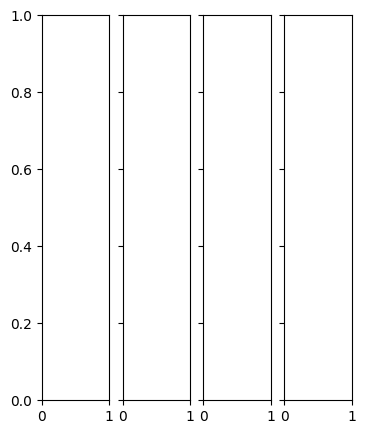

In [3]:
plot_lfp_across_shanks(recording_basenames=["M20_D23_2024-05-25_14-54-34_VR1",
                                            "M20_D24_2024-05-26_14-49-32_VR1", 
                                            "M20_D25_2024-05-27_14-24-21_VR1",
                                            "M20_D26_2024-05-28_15-18-55_VR1"], recording_subfolder="/mnt/datastore/Harry/Cohort11_april2024/vr/", vmax_gain=0.9)

In [ ]:
plot_lfp_across_shanks(recording_basenames=["M21_D26_2024-05-28_17-04-41_VR1", 
                                            "M21_D24_2024-05-26_16-35-19_VR1", 
                                            "M21_D23_2024-05-25_16-54-12_VR1", 
                                            "M21_D25_2024-05-27_16-00-30_VR1"], recording_subfolder="/mnt/datastore/Harry/Cohort11_april2024/vr/", vmax_gain=0.9)

In [ ]:
plot_lfp_across_shanks(recording_basenames=["M22_D36_2024-10-23_14-29-08_VR1",
                                            "M22_D35_2024-10-22_13-22-24_VR1",
                                            "M22_D33_2024-10-20_13-05-11_VR1",
                                            "M22_D34_2024-10-21_14-22-29_VR1"], recording_subfolder="/mnt/datastore/Harry/Cohort12_august2024/vr/", vmax_gain=0.8)

gain is 0.5


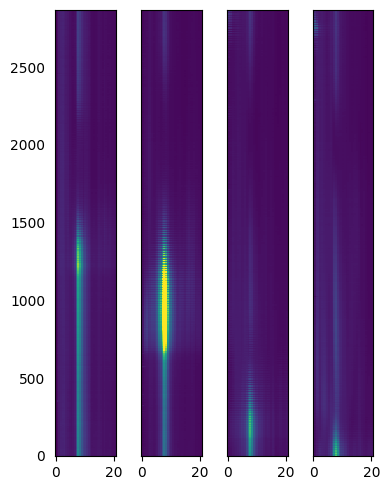

vmax for power spectras is 126204.3580078125


In [10]:
plot_lfp_across_shanks(recording_basenames=["M25_D0_2024-11-01_15-20-35_1",
                                            "M25_D0_2024-11-01_15-22-00_2",
                                            "M25_D0_2024-11-01_15-23-14_3",
                                            "M25_D0_2024-11-01_15-24-27_4"], recording_subfolder="/mnt/datastore/Harry/Cohort12_august2024/ephys_test/", vmax_gain=0.5)

gain is 0.8


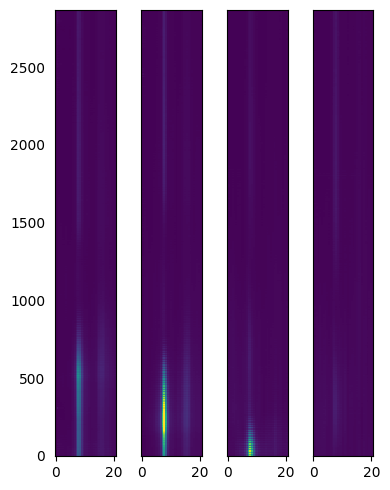

vmax for power spectras is 150859.58671874998


In [ ]:
plot_lfp_across_shanks(recording_basenames=["M26_D0_2024-10-24_15-14-08_1",
                                            "M26_D0_2024-10-24_15-15-24_2",
                                            "M26_D0_2024-10-24_15-16-44_3",
                                            "M26_D0_2024-10-24_15-17-58_4"], recording_subfolder="/mnt/datastore/Harry/Cohort12_august2024/ephys_test/", vmax_gain=0.5)

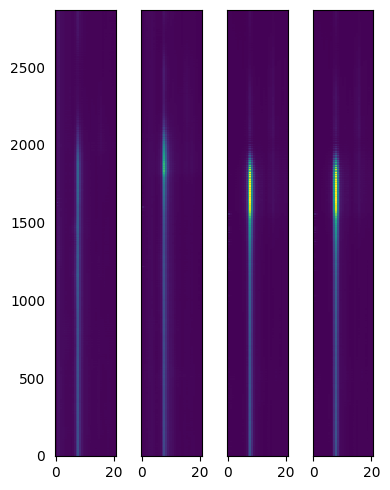

vmax for power spectras is 215961.509765625


In [ ]:
plot_lfp_across_shanks(recording_basenames=["M27_D0_2024-10-31_15-12-34_1",
                                            "M27_D0_2024-10-31_15-14-48_2",
                                            "M27_D0_2024-10-31_15-16-11_3",
                                            "M27_D0_2024-10-31_15-16-11_3"], recording_subfolder="/mnt/datastore/Harry/Cohort12_august2024/ephys_test/", vmax_gain=0.7)

gain is 0.5


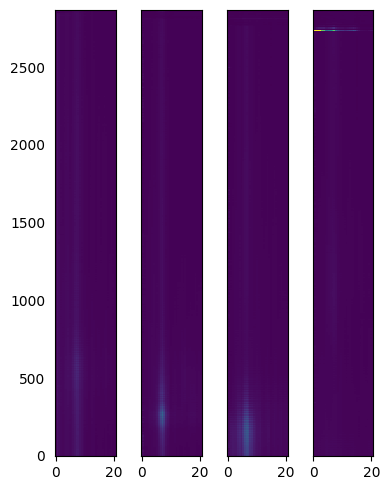

vmax for power spectras is 527245.3875


In [ ]:
plot_lfp_across_shanks(recording_basenames=["M28_D0_2024-12-05_14-39-26_0",
                                            "M28_D0_2024-12-05_14-40-51_1",
                                            "M28_D0_2024-12-05_14-42-03_2",
                                            "M28_D0_2024-12-05_14-43-07_3"], recording_subfolder="/mnt/datastore/Harry/Cohort12_august2024/ephys_test/", vmax_gain=0.1)

In [ ]:
plot_lfp_across_shanks(recording_basenames=["M29_D0_2024-12-05_16-32-29_0",
                                            "M29_D0_2024-12-05_16-33-40_1",
                                            "M29_D0_2024-12-05_16-34-52_2",
                                            "M29_D0_2024-12-05_16-36-12_3"], recording_subfolder="/mnt/datastore/Harry/Cohort12_august2024/ephys_test/", vmax_gain=0.5) 